In [14]:
%matplotlib widget
from main import *
import sympy as sp
from sympy import Heaviside, sin, cos
sp.init_printing()

In [15]:
Vcc = 5

Vin = 5 * sin(t)

In [16]:
acTest = Solver.Circuit("acTest")
acTest.element(
                    VoltageSource("Vg1", {"V+" : "V1", "V-" : Gnd}, V_t = Vin),
                    VoltageSource("Vg2", {"V+" : Gnd, "V-" : "V2"}, V_t = Vin),
                    
                    Diode("D1", {"Vp" : "V1", "Vn" : "V3"}),
                    Diode("D2", {"Vp" : "V2", "Vn" : "V3"}),
                    
                    Resistor("R1", {"V1" : "V3", "V2" : "Vc"}, R = 1),
                    
                    #Resistor("R2", {"V1" : "Vc", "V2" : Gnd}, R = 1e5),
                    CurrentSource("Iout", {"V+" : "Vc", "V-" : Gnd}, I_t = -1e-3),
                    Capacitor("C1", {"V1" : "Vc", "V2" : Gnd}, V0 = 3.5, C = 5e-3),
)

{'Vg1': {'name': 'Vg1', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*sin(t)}},
 'Vg2': {'name': 'Vg2', 'type': 'VoltageSource', 'nodes': {'V+': 0, 'V-': 'V2'}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*sin(t)}},
 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V3'}, 'values': {'Vd': 0.6, 'T': 300}},
 'D2': {'name': 'D2', 'type': 'Diode', 'nodes': {'Vp': 'V2', 'Vn': 'V3'}, 'values': {'Vd': 0.6, 'T': 300}},
 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'V3', 'V2': 'Vc'}, 'values': {'R': 1}},
 'Iout': {'name': 'Iout', 'type': 'CurrentSource', 'nodes': {'V+': 'Vc', 'V-': 0}, 'values': {'Idc': 0, 'Iac': 0, 'I_t': -0.001}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 0.005, 'V0': 3.5}}}

In [17]:
Solver.setMain("acTest")
compiled = Solver.compile()

In [18]:
model = solveLaplace(compiled, 3 * sp.pi, 0.1, debugLog = True)

{I6_0, I4_0, I0_1, I0_0, V2, I2_0, V1, V0, I5_1, I1_0, I5_0, I2_1, I6_1, I1_1, I4_1, V3, I3_0, I3_1}
[Eq(I2_1 + I3_1 + I4_0, 0), Eq(I0_0 + I2_0, 0), Eq(I4_1 + I5_0 + I6_0, 0), Eq(I1_1 + I3_0, 0)]
{'Vg1': {'name': 'Vg1', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*sin(t)}}, 'Vg2': {'name': 'Vg2', 'type': 'VoltageSource', 'nodes': {'V+': 0, 'V-': 'V2'}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 5*sin(t)}}, 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V3'}, 'values': {'Vd': 0.6, 'T': 300}}, 'D2': {'name': 'D2', 'type': 'Diode', 'nodes': {'Vp': 'V2', 'Vn': 'V3'}, 'values': {'Vd': 0.6, 'T': 300}}, 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'V3', 'V2': 'Vc'}, 'values': {'R': 1}}, 'Iout': {'name': 'Iout', 'type': 'CurrentSource', 'nodes': {'V+': 'Vc', 'V-': 0}, 'values': {'Idc': 0, 'Iac': 0, 'I_t': -0.001}}, 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 0.005, 'V0':

In [19]:
print(compiled["nodes"])

Vin = compiled["voltages"]["Vg1"]["V+"]
Id1 = compiled["currents"]["D1"]["Vp"]
Id2 = compiled["currents"]["D2"]["Vp"]
Vd = compiled["voltages"]["D1"]["Vp"] - compiled["voltages"]["D1"]["Vn"]
Vc = compiled["nodes"]["Vc"]
Iout = compiled["currents"]["Iout"]["V+"]

{'V3': V0, 'V1': V1, 'Vc': V2, 'V2': V3}


In [20]:
printModel(model, var=t, important={Id1, Id2})

{('C1', ''), ('Vg1', ''), ('Iout', ''), ('R1', ''), ('D1', 'Cut'), ('Vg2', ''), ('D2', 'Cut')}
t ∈ Interval.Ropen(0, 0.901019287109375)
{I3_0: 0, I2_0: 0}
{I3_0: 0, I2_0: 0}
{I3_0: 0, I2_0: 0}
-------------------------------------
{('C1', ''), ('Vg1', ''), ('D1', 'Fwd'), ('Iout', ''), ('R1', ''), ('Vg2', ''), ('D2', 'Cut')}
t ∈ Interval.Ropen(0.901019287109375, 1.61580810546875)
{I3_0: 0, I2_0: -0.0195209131165689*sin(t) + 0.0156178848275298*cos(t) + 0.001 - 0.0166135192643497*exp(-200.0*t)}
{I3_0: 0, I2_0: -0.00460785904585894}
{I3_0: 0, I2_0: -0.0192038925987370}
-------------------------------------
{('C1', ''), ('Vg1', ''), ('Iout', ''), ('R1', ''), ('D1', 'Cut'), ('Vg2', ''), ('D2', 'Cut')}
t ∈ Interval.Ropen(1.61580810546875, 4.24719238281250)
{I3_0: 0, I2_0: 0}
{I3_0: 0, I2_0: 0}
{I3_0: 0, I2_0: 0}
-------------------------------------
{('C1', ''), ('Vg1', ''), ('Iout', ''), ('R1', ''), ('D2', 'Fwd'), ('D1', 'Cut'), ('Vg2', '')}
t ∈ Interval.Ropen(4.24719238281250, 4.75742187500

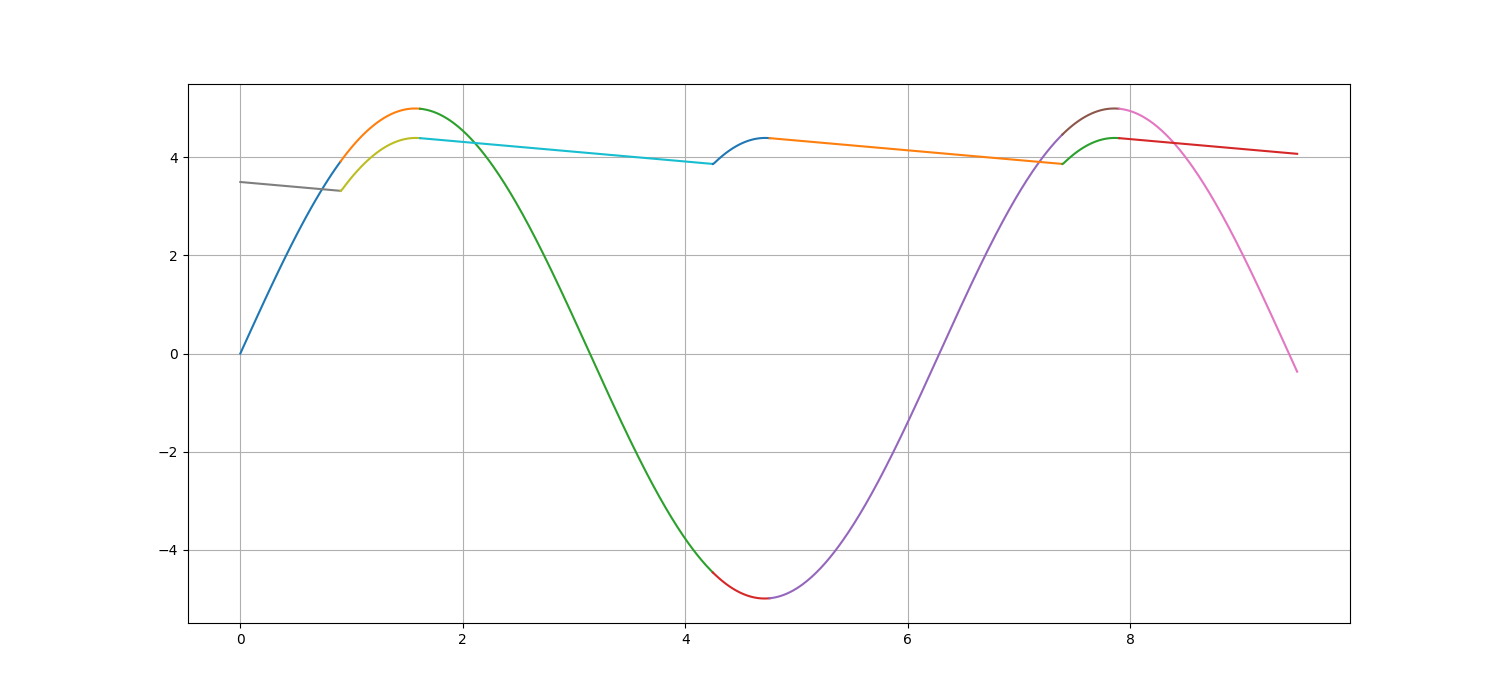

In [21]:
measurments =   [   
                    (Vin, "Vin(t)"),
                    (Vc, "Vc(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()

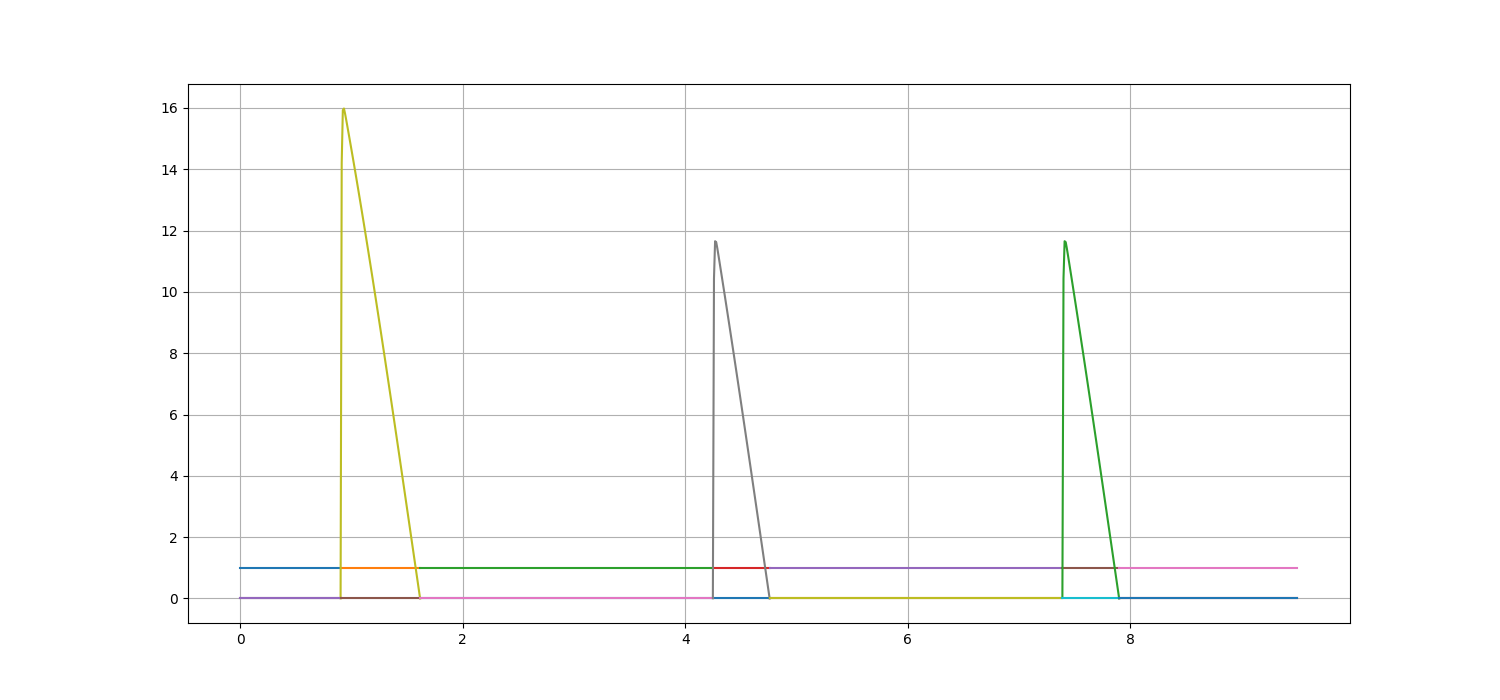

In [22]:
measurments =   [   
                    (1e3 * Iout, "Iout(t)"),
                    (1e3 * Id1, "Id1(t)"),
                    (1e3 * Id2, "Id2(t)"),
                    #(Vd, "Vd(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()